In [ ]:
!pip install river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361404 sha256=a4f4b9eefb59fc3ecd93f05799f39113d241c7621954a9cd70c3fdbd9471ab23
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
Successfully built river


In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=3f4c9a1e93829b55c1e1a7df34f6317ae3afbe5060a448548bf7b22da0ba92ed
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic/word2vec_embeddings_3.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,-0.282402,0.266967,0.065208,-0.028991,-0.007023,-0.771427,0.232273,1.207871,-0.591220,-0.309825,...,0.042316,0.310536,0.162041,0.959328,0.440757,0.254530,-0.369880,0.145212,-0.116297,1
1,-0.291088,0.254678,0.064866,-0.057217,-0.062241,-0.777611,0.250659,1.273771,-0.543295,-0.394929,...,0.054725,0.335485,0.092124,0.927354,0.550294,0.228266,-0.344106,0.213569,-0.058613,2
2,-0.261362,0.254425,0.068230,-0.053486,-0.033278,-0.689748,0.213416,1.108689,-0.507155,-0.327768,...,0.065789,0.280096,0.091490,0.850703,0.469683,0.221899,-0.304451,0.158464,-0.077235,1
3,-0.286113,0.391083,0.128172,-0.073136,-0.001999,-0.815213,0.267318,1.340139,-0.703260,-0.387489,...,0.132497,0.319347,0.131601,1.123702,0.524509,0.338532,-0.356903,0.165753,-0.152370,1
4,-0.245734,0.306324,0.101826,-0.071761,-0.020645,-0.699376,0.215515,1.146781,-0.553634,-0.339269,...,0.098094,0.289700,0.093295,0.920155,0.471642,0.250729,-0.294243,0.149158,-0.102090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485,2
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364,0
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177,1
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880,0


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.43, test_size = 0.57, shuffle=False, random_state = 0)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1290,-0.310050,0.300677,0.065016,-0.133605,-0.059403,-0.785804,0.272863,1.335785,-0.513274,-0.482336,...,0.816608,0.139094,0.327774,0.016366,0.961914,0.668297,0.239355,-0.318937,0.234278,-0.049346
1291,-0.193624,0.229374,0.064823,-0.041480,0.004520,-0.499604,0.165664,0.797643,-0.405902,-0.230950,...,0.482289,0.075482,0.179946,0.066667,0.664483,0.325413,0.185891,-0.223929,0.099935,-0.071775
1292,-0.286824,0.277615,0.061399,-0.131799,-0.061133,-0.741754,0.254120,1.270901,-0.478833,-0.464455,...,0.783563,0.134182,0.314118,0.011466,0.906982,0.641650,0.224346,-0.292937,0.226338,-0.045792
1293,-0.242502,0.291384,0.085841,-0.013633,0.013289,-0.648230,0.213737,1.004601,-0.563222,-0.242409,...,0.577940,0.044770,0.243683,0.129756,0.874645,0.339446,0.240016,-0.323188,0.130466,-0.125732
1294,-0.264546,0.488745,0.164198,-0.102889,0.034595,-0.791486,0.275773,1.331881,-0.763387,-0.389827,...,0.910092,0.210673,0.280192,0.124670,1.224776,0.513853,0.407311,-0.326990,0.125790,-0.219279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.313844,0.486717,0.127441,-0.110789,0.055357,-0.805933,0.282415,1.324012,-0.717741,-0.391278,...,0.854515,0.213904,0.239798,0.090951,1.214346,0.529893,0.353217,-0.366810,0.117098,-0.188485
2996,-0.229370,0.246962,0.072126,-0.027051,-0.002868,-0.601071,0.194752,0.948708,-0.492534,-0.247602,...,0.541247,0.043127,0.236235,0.106006,0.782842,0.347924,0.208732,-0.286824,0.131814,-0.094364
2997,-0.274848,0.296477,0.080733,-0.048536,-0.009738,-0.724364,0.234730,1.157373,-0.573305,-0.327971,...,0.675335,0.070327,0.281320,0.104546,0.930048,0.461124,0.246414,-0.334507,0.162923,-0.096177
2998,-0.233363,0.249164,0.077844,-0.003231,-0.005001,-0.643630,0.205270,0.995505,-0.540571,-0.240271,...,0.560564,0.018829,0.256943,0.133459,0.824737,0.344565,0.220645,-0.314877,0.141798,-0.104880


In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )
classifier = DecisionTreeClassifier()
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 555.63671875 MB
Accuracy: 0.6760233918128655
Memory (After) : 556.8515625 MB
Memory Consumption : 1.21484375 MB
CPU times: user 120 ms, sys: 907 µs, total: 121 ms
Wall time: 324 ms


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = DecisionTreeClassifier() # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred[0])

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.95, 0.99, 0.001),
    'b': hp.quniform('b', 0.90, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1000, 50),
    'win2': hp.quniform('win2', 1000, 3000, 100),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.969 0.933 300 2000 0.6350877192982456
0.982 0.933 750 1400 0.6754385964912281
0.9550000000000001 0.913 500 2200 0.6807017543859649
0.967 0.9470000000000001 800 1200 0.6824561403508772
0.988 0.961 750 2100 0.6777777777777778
0.967 0.935 700 1900 0.6748538011695906
0.977 0.917 600 1500 0.6807017543859649
0.96 0.9490000000000001 850 2200 0.691812865497076
0.983 0.9400000000000001 650 2000 0.6847953216374268
0.973 0.93 650 1600 0.6801169590643275
100%|██████████| 10/10 [00:08<00:00,  1.22trial/s, best loss: -0.691812865497076]
Hyperopt estimated optimum {'a': 0.96, 'b': 0.9490000000000001, 'win1': 850.0, 'win2': 2200.0}
8.182379722595215


In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = DecisionTreeClassifier() # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1290,3000):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred[0])
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.95,0.99],
    'b': [0.90,0.98],
    'win1': [200,1000],
    'win2': [1000,5000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=10,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.957 0.969 325 2811 0.6304093567251462
0.959 0.914 675 1561 0.6877192982456141
0.979 0.954 275 3561 0.6391812865497076
0.989 0.934 475 2561 0.6777777777777778
0.969 0.974 875 4561 0.683625730994152
0.964 0.924 375 1061 0.6409356725146199
0.984 0.964 775 3061 0.683625730994152
0.974 0.904 975 2061 0.6760233918128655
0.954 0.944 575 4061 0.6795321637426901
0.953 0.902 300 4936 0.6538011695906433
{'a': 0.95923828125, 'b': 0.9142578125, 'win1': 674.609375, 'win2': 1560.546875}
Accuracy:0.6877192982456141


In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]
    dri = []
    mt = 0

    classifier = DecisionTreeClassifier() # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = DecisionTreeClassifier() # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1290,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred[0])
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    dri.append(i)
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                        mt+=1
                    else:
                        classifier.fit(x_new,y_new)
                        mt+=1
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            mt+=1
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        mt+=1
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='ASW+DT, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline DT, Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(10,100)
    #plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()
    print(dri)
    print(dr)
    print(mt)


[]
[0]
0


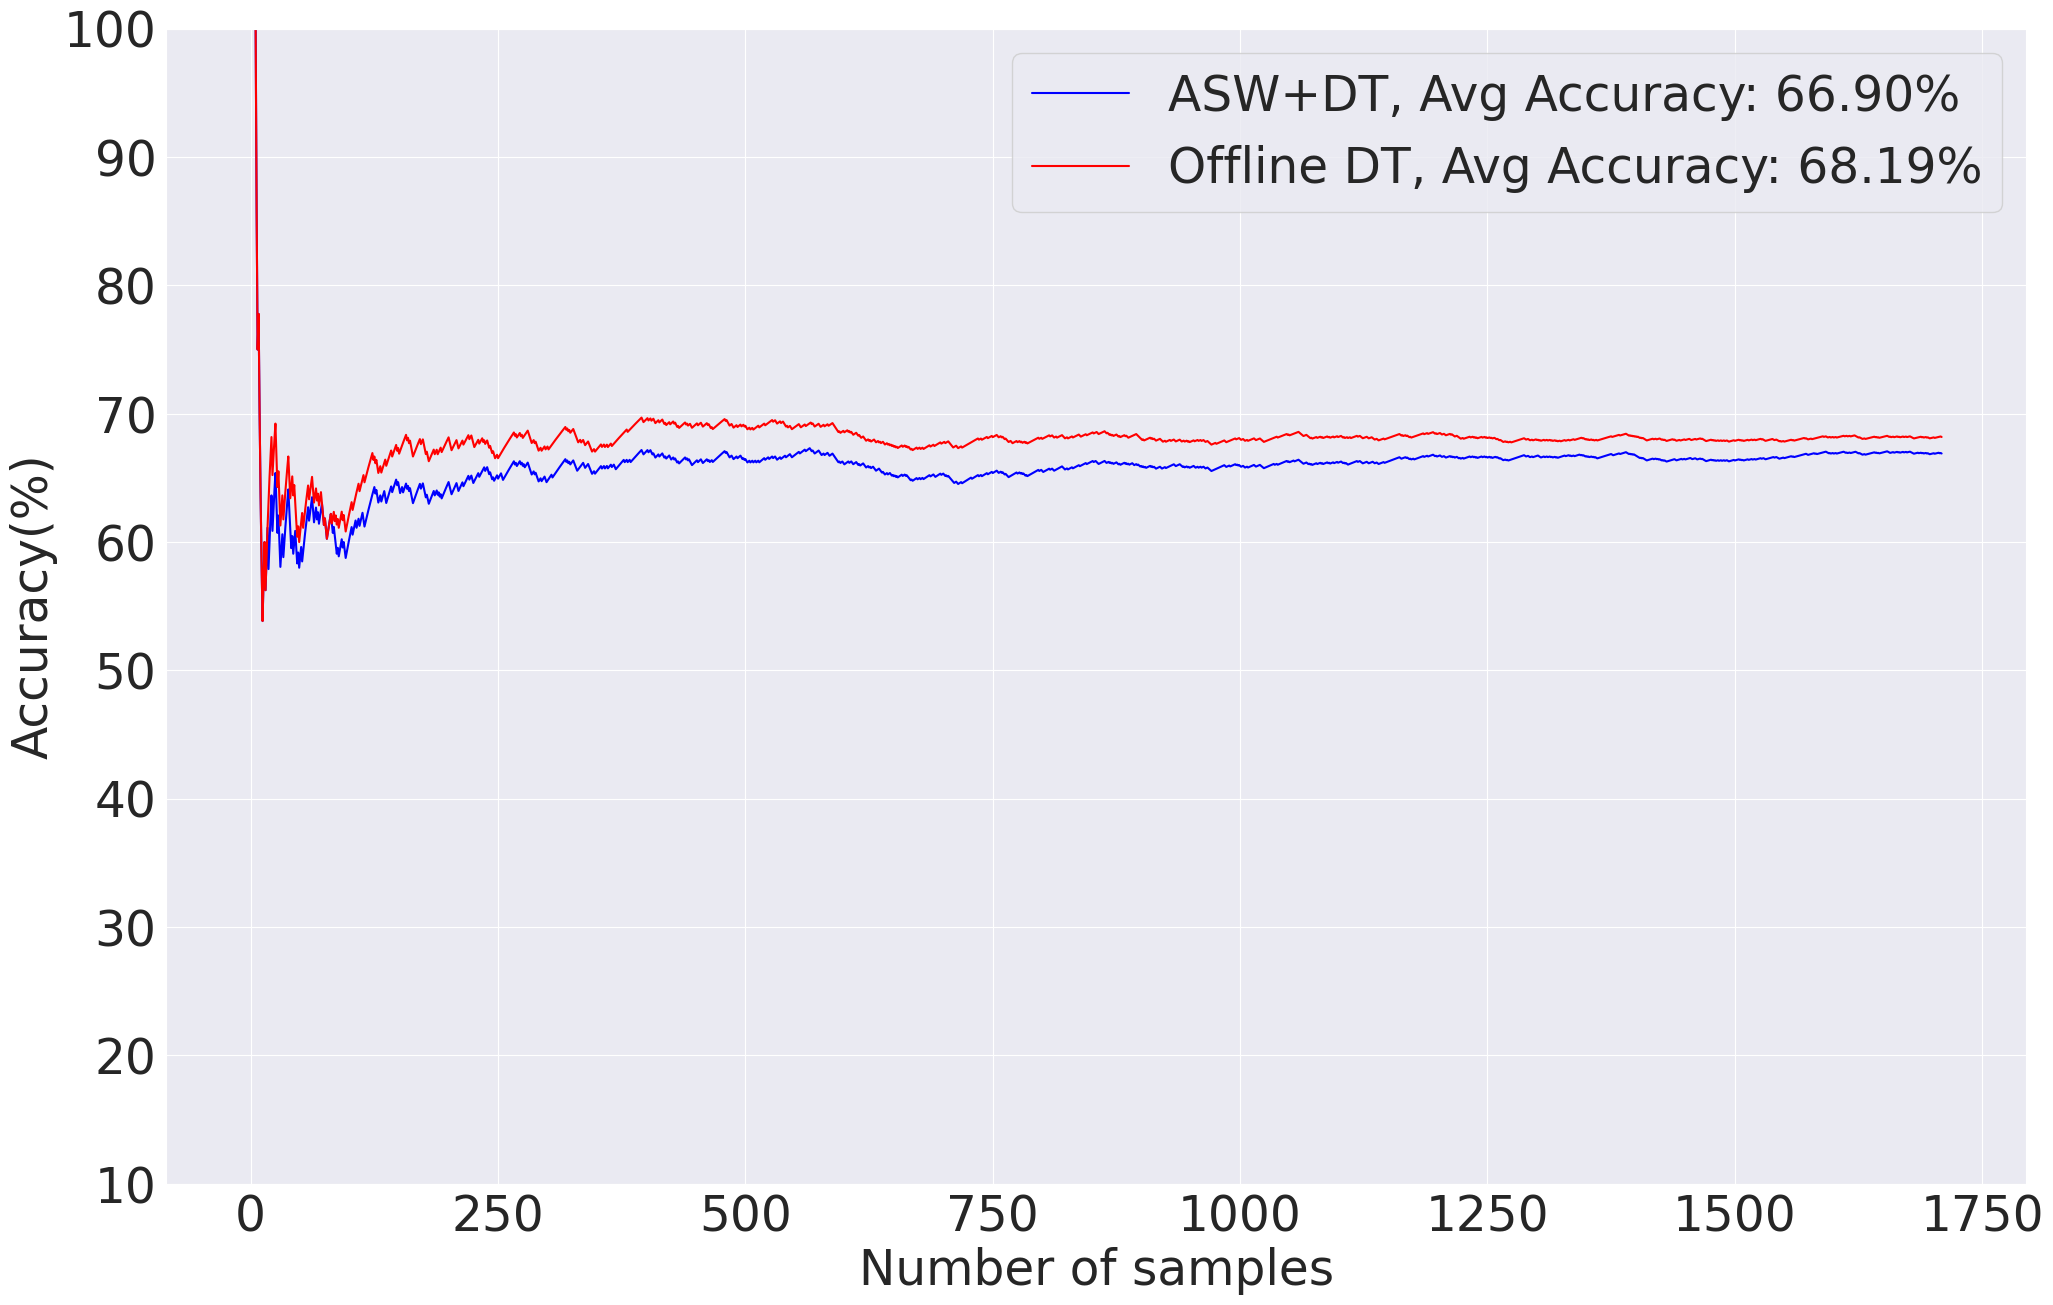

In [ ]:
oasw_plot(a= 0.9595507812499999, b= 0.9236328125, win1= 918.359375, win2= 4716.796875)

[]
[0]
0


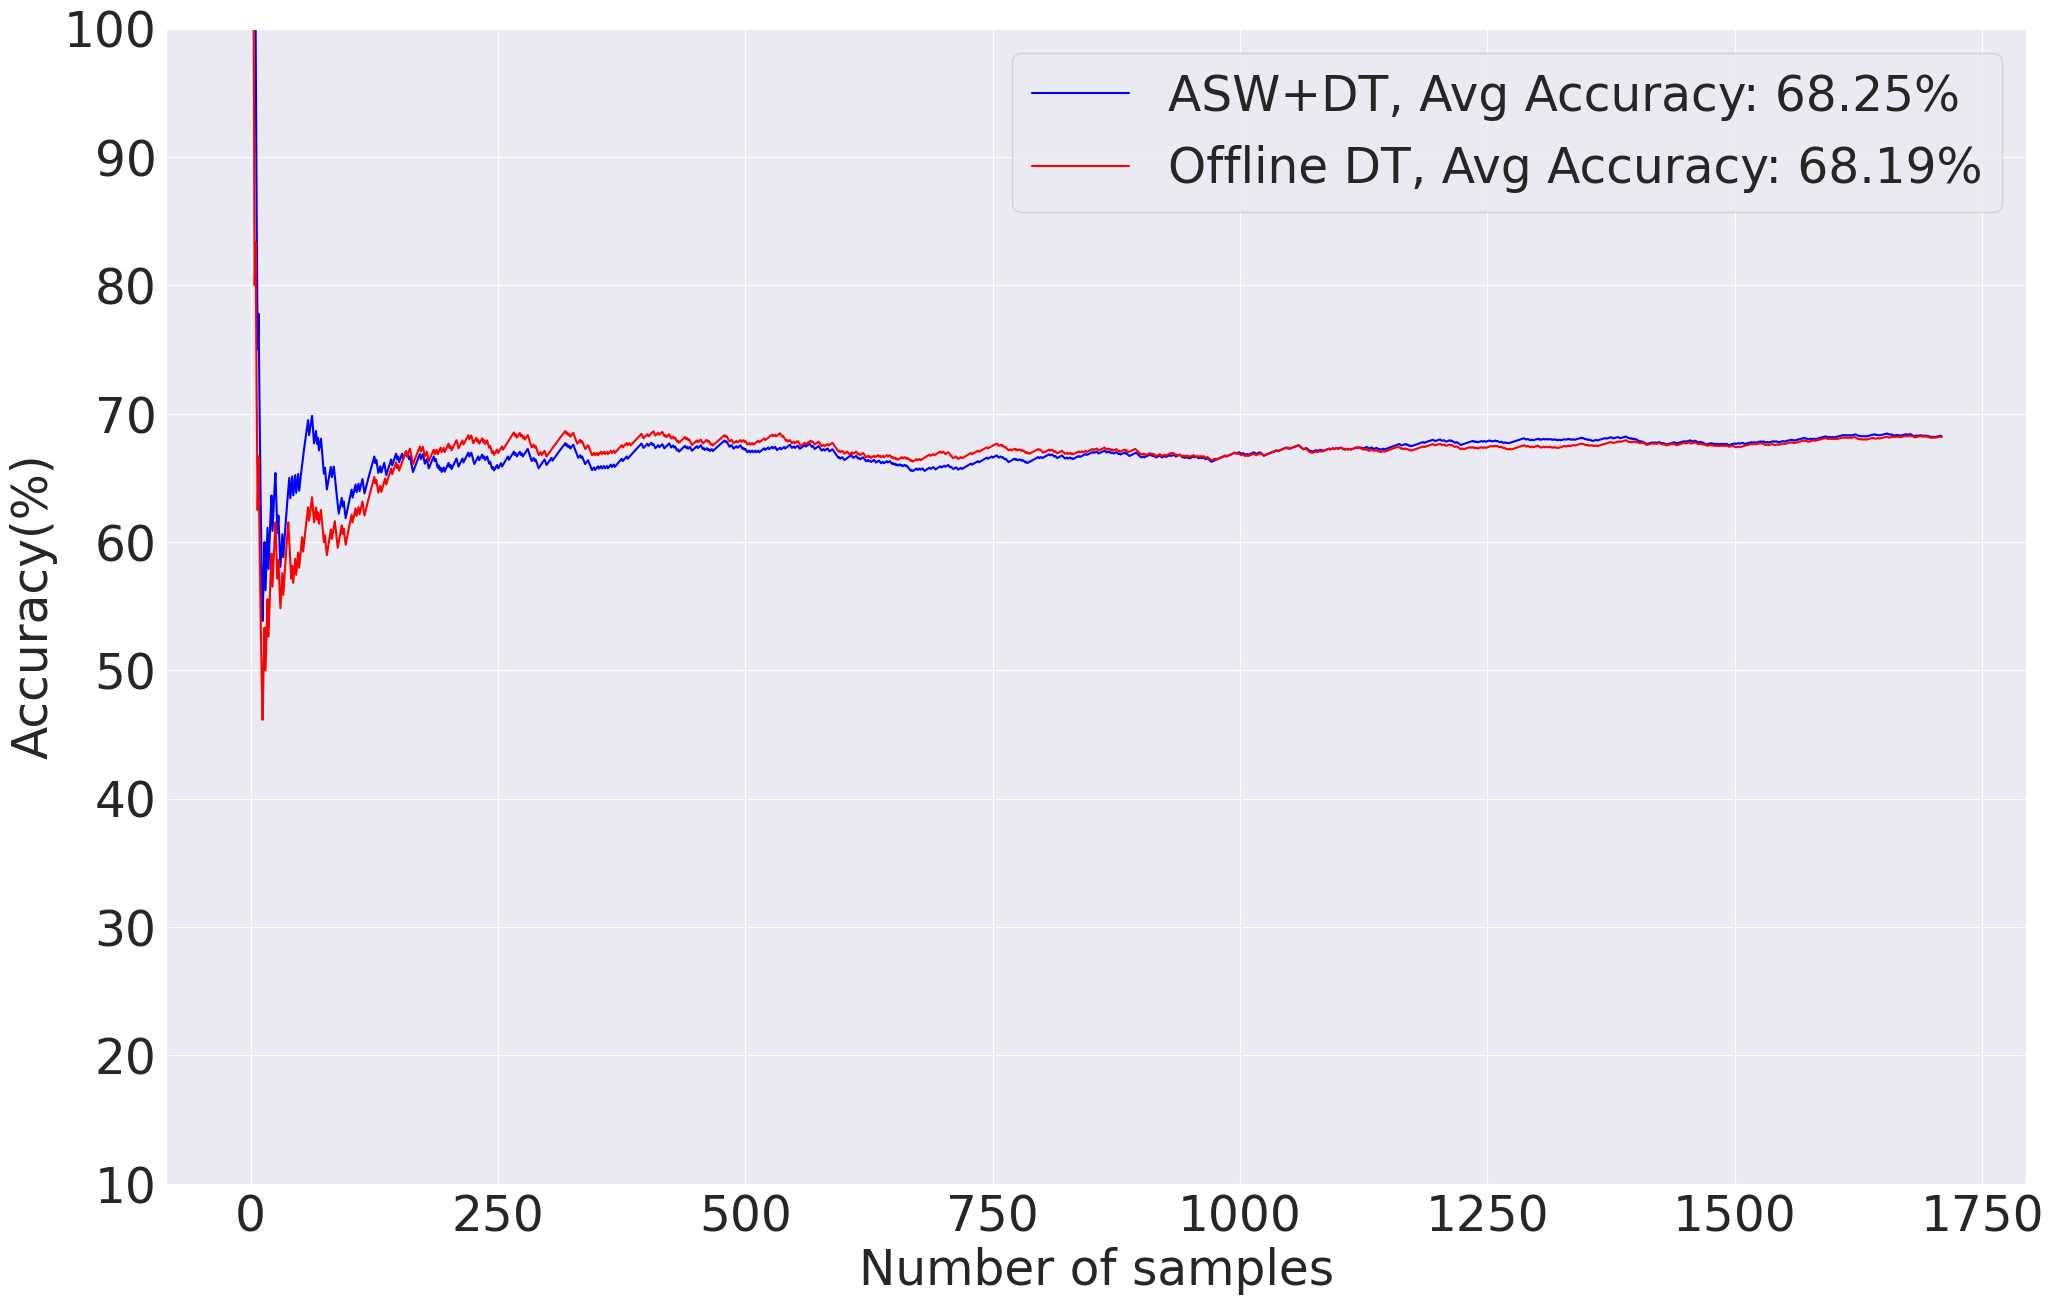

In [ ]:
oasw_plot(a= 0.966, b= 0.902, win1= 750.0, win2= 2400.0)